In [3]:
a0 = 160.12993
a1 = 0.96946  

def lambda_corrected(lam_obs):
    """Calculate the corrected wavelength using the linear regression parameters."""
    return a0 + a1 * lam_obs
lam_obs = [6290,6250,6220,6180,6140,6090,6050,6010,5970,5940,5890,5860,5820,5790,5750,5730,5700,5670,5640,5610,5580,5550,5520,5490,5470,5440,5420,5400,5370,5350,5330]
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt
lam_corr = [lambda_corrected(lam) for lam in lam_obs]
wave_no = [1/lambda_corrected(lam)*1e8 for lam in lam_obs]  # in cm^-1
#Difference in consecutive wavenumbers
diff_wave_no = [wave_no[i+1]-wave_no[i] for i in range(len(wave_no)-1)]
#Energy in eV E = h*c*wave number
Energy = [wave_no[i]*1.23984193e-4 for i in range(len(wave_no))]  # in eV
corr_table = PrettyTable()
corr_table.field_names = ["Sn.no.", "λ_observed (in Å)", "λ_corrected (in Å)", "Wave number (in cm^-1)","Δ Wave number (in cm^-1)", "Energy (in eV)"]
corr_table.title = "Corrected Wavelengths"
for i in range(len(lam_obs)):
    corr_table.add_row([i+1, lam_obs[i], round(lam_corr[i], 0), round(wave_no[i],0), round(diff_wave_no[i-1],0) if i>0 else "N/A", round(Energy[i],3)]) 
print(corr_table)



+----------------------------------------------------------------------------------------------------------------------+
|                                                Corrected Wavelengths                                                 |
+--------+-------------------+--------------------+------------------------+--------------------------+----------------+
| Sn.no. | λ_observed (in Å) | λ_corrected (in Å) | Wave number (in cm^-1) | Δ Wave number (in cm^-1) | Energy (in eV) |
+--------+-------------------+--------------------+------------------------+--------------------------+----------------+
|   1    |        6290       |       6258.0       |        15979.0         |           N/A            |     1.981      |
|   2    |        6250       |       6219.0       |        16079.0         |          100.0           |     1.994      |
|   3    |        6220       |       6190.0       |        16155.0         |           76.0           |     2.003      |
|   4    |        6180       |  

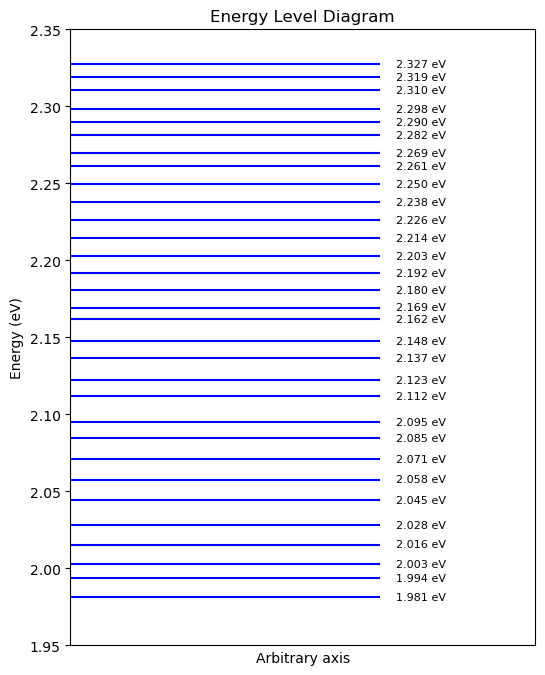

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(6, 8))

# Plot horizontal lines for each energy level
for i, E in enumerate(Energy, start=1):
    plt.hlines(E, xmin=0, xmax=1, colors="b")
    plt.text(1.05, E, f"{E:.3f} eV", va='center', fontsize=8)

# Formatting
plt.ylim(1.95, 2.35)  # zoomed around energy range
plt.xlim(0, 1.5)
plt.xlabel("Arbitrary axis")
plt.ylabel("Energy (eV)")
plt.title("Energy Level Diagram")
plt.xticks([])
plt.grid(False)
plt.show()
